<h3>Importing Relevant Libraries</h3>

In [223]:
# import pandas library
import pandas as pd
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats

<h3>Loading Dataset</h3>

In [224]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h3>Data Cleansing</h3>

In [225]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [226]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<h4>Checking for null values</h4>

In [227]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

age
False    1338
Name: age, dtype: int64

sex
False    1338
Name: sex, dtype: int64

bmi
False    1338
Name: bmi, dtype: int64

children
False    1338
Name: children, dtype: int64

smoker
False    1338
Name: smoker, dtype: int64

region
False    1338
Name: region, dtype: int64

charges
False    1338
Name: charges, dtype: int64



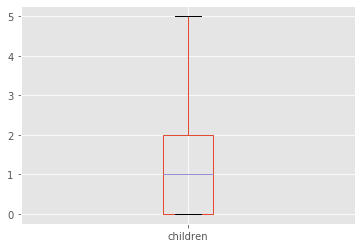

In [228]:
boxplot = df.boxplot(column=['children'])
plt.show()

In [229]:
df_children = df.groupby(['children']).size().reset_index(name = 'Total Number Of Children')
df_children

,children,Total Number Of Children
0,0,574
1,1,324
2,2,240
3,3,157
4,4,25
5,5,18


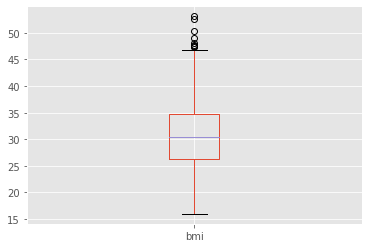

In [230]:
boxplot = df.boxplot(column=['bmi'])
plt.show()

In [231]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [232]:
sorted(df['bmi'])

[15.96,
 16.815,
 16.815,
 17.195,
 17.29,
 17.29,
 17.29,
 17.385,
 17.4,
 17.48,
 17.67,
 17.765,
 17.8,
 17.86,
 17.955,
 18.05,
 18.3,
 18.335,
 18.335,
 18.335,
 18.5,
 18.6,
 18.715,
 18.905,
 19.0,
 19.095,
 19.19,
 19.3,
 19.475,
 19.57,
 19.8,
 19.8,
 19.8,
 19.855,
 19.855,
 19.95,
 19.95,
 19.95,
 19.95,
 19.95,
 19.95,
 20.045,
 20.045,
 20.1,
 20.13,
 20.235,
 20.235,
 20.235,
 20.235,
 20.3,
 20.35,
 20.4,
 20.425,
 20.52,
 20.52,
 20.6,
 20.6,
 20.615,
 20.7,
 20.79,
 20.8,
 20.8,
 20.9,
 20.9,
 21.01,
 21.09,
 21.12,
 21.28,
 21.3,
 21.375,
 21.375,
 21.4,
 21.4,
 21.47,
 21.47,
 21.47,
 21.5,
 21.56,
 21.565,
 21.66,
 21.66,
 21.66,
 21.7,
 21.755,
 21.755,
 21.755,
 21.755,
 21.78,
 21.78,
 21.8,
 21.85,
 21.85,
 21.85,
 21.85,
 21.89,
 21.945,
 22.0,
 22.04,
 22.1,
 22.135,
 22.135,
 22.135,
 22.135,
 22.22,
 22.23,
 22.23,
 22.3,
 22.3,
 22.42,
 22.42,
 22.42,
 22.515,
 22.515,
 22.515,
 22.515,
 22.515,
 22.6,
 22.6,
 22.61,
 22.61,
 22.61,
 22.61,
 22.705,
 22.705

In [233]:
q1, q3= np.percentile(df['bmi'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr) 
print("The lower bound is", lower_bound)
print("The upper bound is", upper_bound)

The lower bound is 13.7
The upper bound is 47.290000000000006


In [234]:
df_bmi = df.groupby(['bmi']).size().reset_index(name = 'BMI Distribution')
df_bmi_high = df.loc[df['bmi'] >= 47.290000000000006]
df_bmi_high

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [235]:
df = df.drop(df.index[(df['bmi'] > 47.290000000000006)])

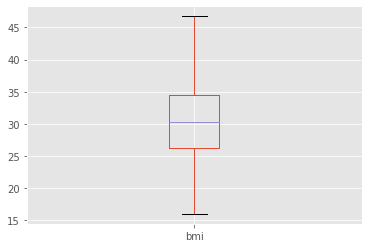

In [236]:
boxplot = df.boxplot(column=['bmi'])
plt.show()

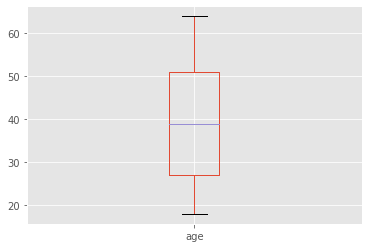

In [237]:
boxplot = df.boxplot(column=['age'])
plt.show()

<h3> Finding Most Relevant Features </h3>

<h4>Continuous Variables</h4>

In [238]:
#Calculate the correlation between variables
df.corr()

,age,bmi,children,charges
age,1.000000,0.114686,0.043041,0.302022
bmi,0.114686,1.000000,0.017355,0.193196
children,0.043041,0.017355,1.000000,0.069739
charges,0.302022,0.193196,0.069739,1.000000


(0, 65666.43974376048)

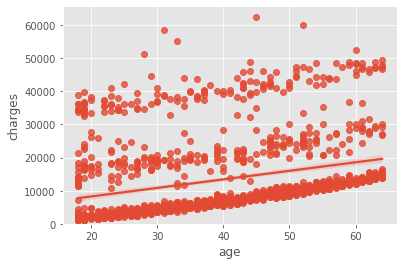

In [240]:
sns.regplot(x="age", y="charges", data=df)
plt.ylim(0,)

It seems like there is a correlation between age and charges.It also seems that once age increases beyond 30, the charges grow faster.

(0, 65666.43974376048)

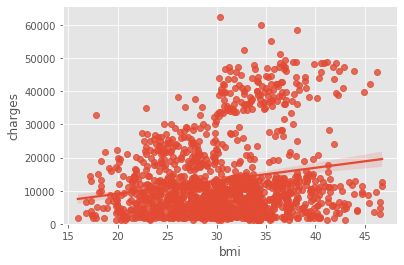

In [241]:
sns.regplot(x="bmi", y="charges", data=df)
plt.ylim(0,)

It seems like there is a correlation between BMI and charges.It also seems that once BMI increases beyond 30, the charges grow faster.

(0, 65666.43974376048)

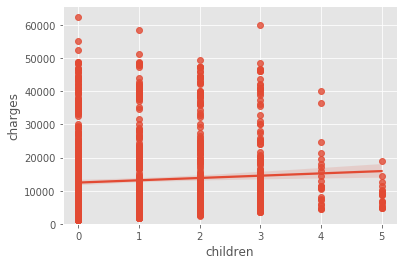

In [242]:
sns.regplot(x="children", y="charges", data=df)
plt.ylim(0,)

There seems to be no correlation between number of children and charges

In [195]:
pearson_coef, p_value = stats.pearsonr(df['age'], df['charges'])
print("The Pearson Correlation Coefficient between charge and age is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient between charge and age is 0.3020217839155803  with a P-value of P = 1.9745879636818617e-29


In [196]:
pearson_coef, p_value = stats.pearsonr(df['bmi'], df['charges'])
print("The Pearson Correlation Coefficient between charge and bmi is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient between charge and bmi is 0.19319613016496306  with a P-value of P = 1.2168105870380684e-12


In [197]:
pearson_coef, p_value = stats.pearsonr(df['children'], df['charges'])
print("The Pearson Correlation Coefficient between charges and number of childrenis", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient between charges and number of childrenis 0.06973923212310341  with a P-value of P = 0.010988017451374265


<h4>Categorical Variables</h4>

<h5>Null Hypothesis: Mean charges between all regions are equal.


Alternative Hypothesis:Mean charges between all regions are not equal.</h5>

In [243]:
df_regions=df[['region', 'charges']]
grouped_test2=df_regions.groupby(['region'])
grouped_test2.head(2)

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
8,northeast,6406.41070
10,northeast,2721.32080
12,southwest,1826.84300


In [254]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('southwest')['charges'], grouped_test2.get_group('southeast')['charges'],grouped_test2.get_group('northwest')['charges'],grouped_test2.get_group('northeast')['charges'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 2.8845336097153154 , P = 0.03465713619614703


F value is pretty close to 1, but p value is less than 0.05. This means that we can reject the null hypothesis.

<h5>Null Hypothesis: Mean charges between all smoker statuses are equal.

    
    

Alternative Hypothesis:Mean charges between all smoker statuses are not equal.</h5>

In [245]:
df_smoker=df[['smoker', 'charges']]
grouped_test3=df_smoker.groupby(['smoker'])
grouped_test3.head(2)

,smoker,charges
0,yes,16884.9240
1,no,1725.5523
2,no,4449.4620
11,yes,27808.7251


In [255]:
f_val, p_val = stats.f_oneway(grouped_test3.get_group('yes')['charges'], grouped_test3.get_group('no')['charges'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 2143.712098499756 , P = 2.5233056105459822e-279


F value is very large, and p value is much smaller than 0.05. This gives us strong evidence to reject the null hypothesis.

<h5>Null Hypothesis: Mean charges between all sexes are equal.

    
    

Alternative Hypothesis:Mean charges between all sexes are not equal.</h5>

In [257]:
df_regions=df[['sex', 'charges']]
grouped_test4=df_regions.groupby(['sex'])
grouped_test4.head(2)

,sex,charges
0,female,16884.9240
1,male,1725.5523
2,male,4449.4620
5,female,3756.6216


In [258]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test4.get_group('female')['charges'], grouped_test4.get_group('male')['charges'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 5.35453965869183 , P = 0.020820522903890002


F value is close to 1 and p value is much smaller than 0.05. This gives us evidence to reject the null hypothesis.

<h3>Feature Evaluation</h3>

For continuous variables, BMI and age are strongly correlated to charges.

For continuous variable, all have an influence on the charges. However, a larger F value is better. It seems that smoker status is the most relevant. However, we will create multiple models which also include sex and region.
